In [1]:
%%time

import seaborn as sns
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl

from sklearn.tree import export_graphviz
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn import metrics
from scipy.sparse import csr_matrix
from numpy import *
from matplotlib import cm
from math import sqrt
from Util import *
from IPython.display import display, HTML


Wall time: 4.2 s


In [2]:
user_rating_data = pd.read_table('data/u.data.txt',na_values=['?'],delimiter="\t",header=None )
genre_data = pd.read_table('data/u.genre.txt',na_values=['?'],delimiter="\t",header=None)
info_data = pd.read_table('data/u.info.txt',na_values=['?'],delimiter="\t",header=None)
item_data = pd.read_table('data/u.item.txt',na_values=['?'],delimiter="\t",header=None,encoding='latin-1')
occupation_data = pd.read_table('data/u.occupation.txt',na_values=['?'],delimiter="\t",header=None)
user_data = pd.read_table('data/u.user.txt',na_values=['?'],delimiter="\t",header=None)

In [3]:
user_rating_data.columns = ['user_id','item_id','rating','timestamp']
user_rating_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
genre_data.columns=['Genre','Id']
genre_data.head()

,Genre,Id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [5]:
info_data

,0
0,943 users
1,1682 items
2,100000 ratings


In [6]:
item_data.columns = ['movie_id','movie_title','release_date','video_release_date','IMDb_URL','unknown','Action','Adventure','Animation','Children\'s','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
item_data.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
movie_data = item_data[['movie_id','movie_title']]
movie_data.head()

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
occupation_data

,0
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


In [9]:
user_data.columns= ['user_id','age','gender','occupation','zip code']
user_data.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [10]:
user_rating_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [11]:
item_data.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
user_rating_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
item_data.shape

(1682, 24)

In [14]:
user_rating_data.shape

(100000, 4)

In [15]:
## check if any missing data in user data
print('Number of missing values across columns: \n',user_data.isnull().sum())

Number of missing values across columns: 
 user_id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


In [16]:
## get the column with missing values
user_data.columns[user_data.isna().any()]

Index([], dtype='object')

In [17]:
user_data

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [18]:
item_data.columns

Index(['movie_id', 'movie_title', 'release_date', 'video_release_date',
       'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [19]:
user_data.columns


Index(['user_id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')

In [20]:
age_discreet = pd.qcut(user_data.age,3, labels=['young', 'mid-age','old'])
age_discreet


0        young
1          old
2        young
3        young
4      mid-age
        ...   
938      young
939    mid-age
940      young
941        old
942      young
Name: age, Length: 943, dtype: category
Categories (3, object): [young < mid-age < old]

In [21]:
user_data['age_discreet'] = age_discreet
# user_data = user_data.groupby('age_discreet')
# user_data

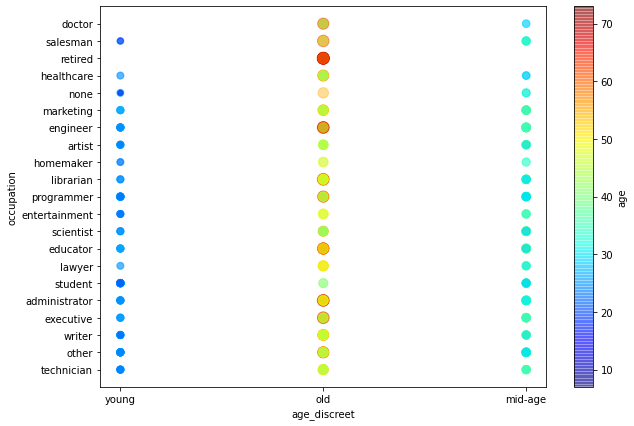

In [22]:
fig, ax = plt.subplots()
user_data.plot(y='occupation', x='age_discreet',kind='scatter',s=user_data.age*2, alpha=0.4,c="age", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7),ax=ax)

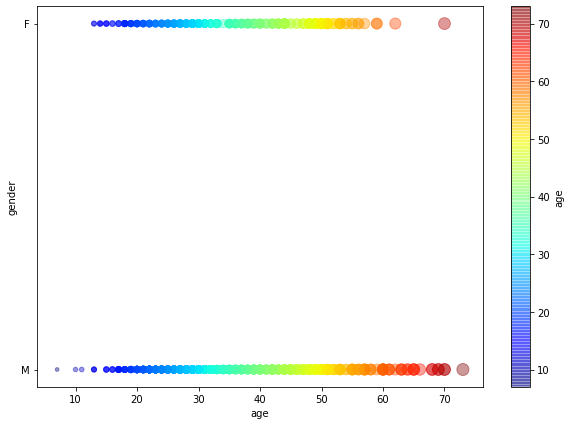

In [23]:
fig, ax = plt.subplots()
user_data.plot(y='gender', x='age',kind='scatter',s=user_data.age*2, alpha=0.4,c="age", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7),ax=ax)

In [24]:
user_data

,user_id,age,gender,occupation,zip code,age_discreet
0,1,24,M,technician,85711,young
1,2,53,F,other,94043,old
2,3,23,M,writer,32067,young
3,4,24,M,technician,43537,young
4,5,33,F,other,15213,mid-age
...,...,...,...,...,...,...
938,939,26,F,student,33319,young
939,940,32,M,administrator,02215,mid-age
940,941,20,M,student,97229,young
941,942,48,F,librarian,78209,old


 ## Analyze User Rating Data

In [25]:
#Five point summary 

user_rating_data.describe()['rating']

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [26]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(user_rating_data.rating.min()))
print('Maximum rating is: %d' %(user_rating_data.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [27]:
#Check for missing values
print('Number of missing values across columns: \n',user_rating_data.isnull().sum())

Number of missing values across columns: 
 user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64


M:\apps\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


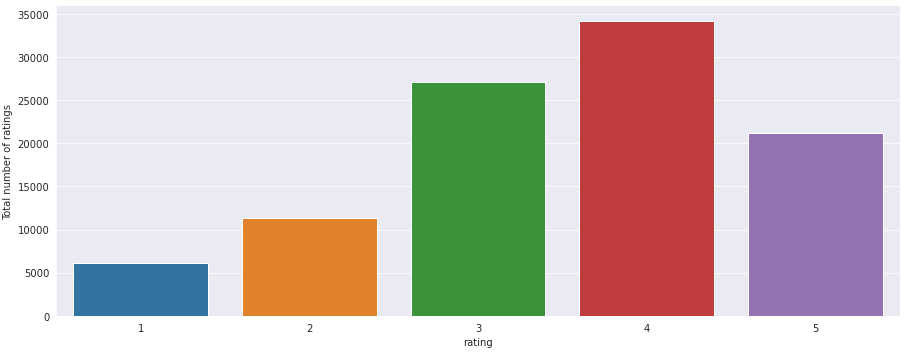

In [28]:
# Check the distribution of the rating
with sns.axes_style('darkgrid'):
    g = sns.factorplot("rating", data=user_rating_data, aspect=2.5,kind='count')
    g.set_ylabels("Total number of ratings")

In [29]:
print("Total data ")
print("-"*40)
print("\nTotal no of ratings :",user_rating_data.shape[0])
print("Total No of Users   :", len(np.unique(user_rating_data.user_id)))
print("Total No of Movies  :", len(np.unique(user_rating_data.item_id)))

Total data 
----------------------------------------

Total no of ratings : 100000
Total No of Users   : 943
Total No of Movies  : 1682


In [30]:
#Dropping the Timestamp column

user_rating_data.drop(['timestamp'], axis=1,inplace=True)

In [31]:
#Analysis of rating given by the user 

no_of_rated_movies_per_user = user_rating_data.groupby(by='user_id')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

user_id
405    737
655    685
13     636
450    540
276    518
Name: rating, dtype: int64

In [32]:
no_of_rated_movies_per_user.describe()

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: rating, dtype: float64

In [33]:
min_rating_count = no_of_rated_movies_per_user.min()
print(' min_rating_count ',min_rating_count)

 min_rating_count  20


In [34]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

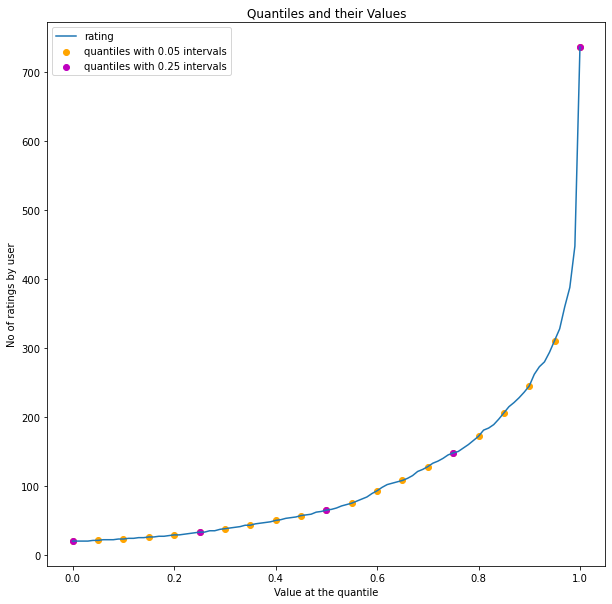

In [35]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [36]:
print('\n No of rated movies more than {} per user : {}\n'.format(min_rating_count, sum(no_of_rated_movies_per_user >= min_rating_count)) )


 No of rated movies more than 20 per user : 943



 ## Merge the user and user rating data to prepare the final data set

In [37]:

## merge movie and movie rating data
merged_df = item_data.merge(user_rating_data, how = 'inner', left_on=['movie_id'], right_on=['item_id'])
merged_df.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,item_id,rating
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,308,1,4
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,287,1,5
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,148,1,4
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,280,1,4
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,66,1,3


In [38]:
user_data

,user_id,age,gender,occupation,zip code,age_discreet
0,1,24,M,technician,85711,young
1,2,53,F,other,94043,old
2,3,23,M,writer,32067,young
3,4,24,M,technician,43537,young
4,5,33,F,other,15213,mid-age
...,...,...,...,...,...,...
938,939,26,F,student,33319,young
939,940,32,M,administrator,02215,mid-age
940,941,20,M,student,97229,young
941,942,48,F,librarian,78209,old


In [39]:
## merge the user info
merged_df = merged_df.merge(user_data, how = 'inner', on=['user_id'])
merged_df.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,War,Western,user_id,item_id,rating,age,gender,occupation,zip code,age_discreet
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,308,1,4,60,M,retired,95076,old
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,308,4,5,60,M,retired,95076,old
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,308,5,4,60,M,retired,95076,old
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,308,7,4,60,M,retired,95076,old
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,308,8,5,60,M,retired,95076,old


In [40]:

print("Merged DaraFrame  - Shape ",merged_df.shape," \n\ncolumns ",merged_df.columns)

Merged DaraFrame  - Shape  (100000, 32)  

columns  Index(['movie_id', 'movie_title', 'release_date', 'video_release_date',
       'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'user_id', 'item_id', 'rating', 'age', 'gender',
       'occupation', 'zip code', 'age_discreet'],
      dtype='object')


In [41]:
## dropping uneccessary columns
final_dataset = merged_df.drop(columns=['release_date','video_release_date','IMDb_URL','item_id'])

In [42]:
## rename movie_id to item_id
updated_columnsNames = ['item_id', 'movie_title', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'user_id', 'rating', 'age',
       'gender', 'occupation', 'zip code', 'age_discreet']
final_dataset.columns = updated_columnsNames
print("\n final data set Shape ",final_dataset.shape," \n\ncolumns ",final_dataset.columns)


 final data set Shape  (100000, 28)  

columns  Index(['item_id', 'movie_title', 'unknown', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'user_id', 'rating', 'age', 'gender',
       'occupation', 'zip code', 'age_discreet'],
      dtype='object')


## Popularity Based Recommendation¶
#### Popularity based recommendation system works with the trend. It basically uses the movies which are in trend right now. For example, if any movie which is usually watched by every new user then there are chances that it may suggest that movie to the test user.

#### The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user you cannot recommend movies accordingly.

In [43]:
print("Unique movie counts ",len(np.unique(final_dataset['item_id'])))

Unique movie counts  1682


In [44]:
#Getting the new dataframe which contains users who has given more than the 5 ratings

new_df=final_dataset.groupby("item_id").filter(lambda x:x['rating'].count() >=5)
print(new_df.shape)
print("Unique movie counts ",len(np.unique(new_df['item_id'])))

(99287, 28)
Unique movie counts  1349


In [45]:
no_of_ratings_per_movie = new_df.groupby(by='item_id')['rating'].count().sort_values(ascending=False)
print(no_of_ratings_per_movie)

item_id
50      583
258     509
100     508
181     507
294     485
       ... 
1333      5
439       5
1324      5
1138      5
1397      5
Name: rating, Length: 1349, dtype: int64


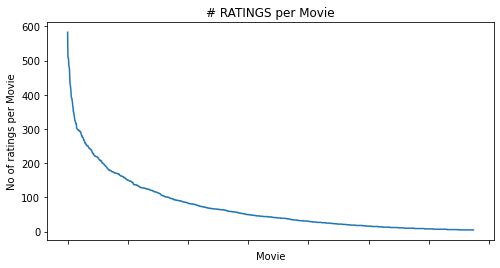

In [46]:
## plot number of ratings per movie
fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of ratings per Movie')
ax.set_xticklabels([])

plt.show()

In [47]:
#Average rating of the movie (sorting in descending order)
new_df.groupby('item_id')['rating'].mean().sort_values(ascending=False).head()

item_id
1449    4.625000
408     4.491071
318     4.466443
169     4.466102
483     4.456790
Name: rating, dtype: float64

In [48]:
#Total no of rating for movie  (sorting in descending order)

new_df.groupby('item_id')['rating'].count().sort_values(ascending=False).head()

item_id
50     583
258    509
100    508
181    507
294    485
Name: rating, dtype: int64

In [49]:
ratings_mean_count = pd.DataFrame(new_df.groupby('item_id')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('item_id')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
item_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


In [50]:
ratings_mean_count.shape

(1349, 2)

In [51]:
print("Max # of ratings ",ratings_mean_count['rating_counts'].max())

Max # of ratings  583


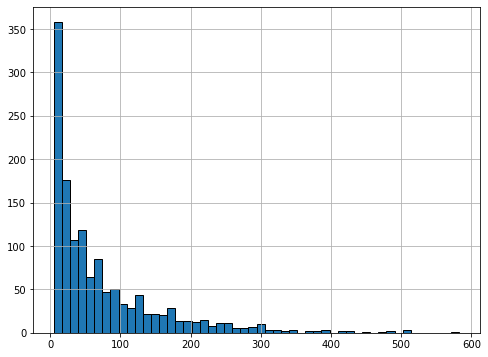

In [52]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

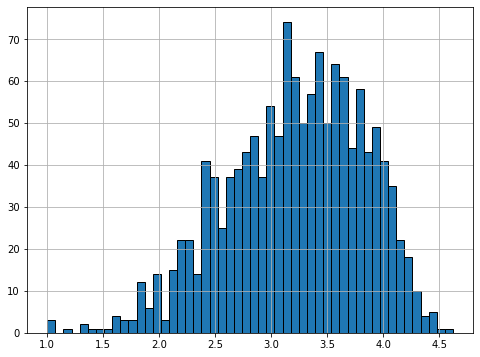

In [53]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

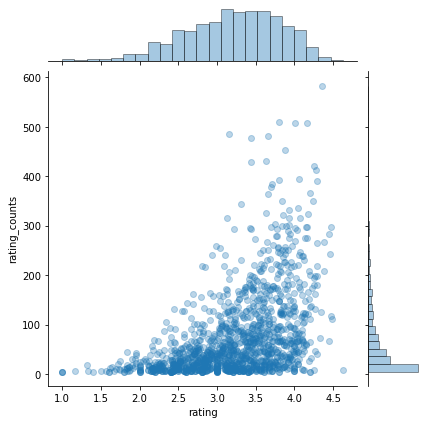

In [54]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.3)

### TOP 30 popular movies

top  30  movies are 

     item_id                                    movie_name  No_of_ratings
0        50                              Star Wars (1977)            583
1       258                                Contact (1997)            509
2       100                                  Fargo (1996)            508
3       181                     Return of the Jedi (1983)            507
4       294                              Liar Liar (1997)            485
5       286                   English Patient, The (1996)            481
6       288                                 Scream (1996)            478
7         1                              Toy Story (1995)            452
8       300                          Air Force One (1997)            431
9       121                 Independence Day (ID4) (1996)            429
10      174                Raiders of the Lost Ark (1981)            420
11      127                         Godfather, The (1972)            413
12       56                 

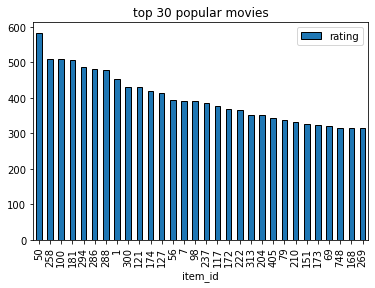

In [55]:
%%time
top_k = 30
movies = []


popular_movies = pd.DataFrame(new_df.groupby('item_id')['rating'].count())
most_popular = popular_movies.sort_values('rating', ascending=False)
most_popular.head


movie_id = most_popular.index
rating = np.array(pd.DataFrame(most_popular['rating']))
for i in range(len(movie_id)):
    #print(np.array(movie_data.loc[movie_data['movie_id']== movie_id[i]]['movie_title']))
    movies.append(np.array(movie_data.loc[movie_data['movie_id']== movie_id[i]]['movie_title'])[0])

top_popular_movies = pd.DataFrame(most_popular.index)
top_popular_movies['movie_name'] = movies
top_popular_movies['No_of_ratings'] = rating

most_popular.head(top_k).plot(kind = "bar",title="top "+str(top_k)+" popular movies")


print("top ",top_k," movies are \n\n",top_popular_movies.head(top_k))


## Collaberative filtering (Item-Item recommedation)¶
#### Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

## 80-20 Data Split

In [56]:
not_needed_columns = ['movie_title','age_discreet','zip code']

final_data = final_dataset.drop(columns=not_needed_columns,inplace=False)
## handle categorical data
final_data = pd.get_dummies(final_data)

rating_class = final_data['rating']

vs_matrix = final_data.drop(['rating'],axis=1)

#vs_matrix = final_data.copy()


vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix,rating_class, test_size=0.2, random_state=33)

# Item ID to be removed for Classification

vs_matrix_rf = vs_matrix.drop(['item_id'],axis=1)

vs_train_rf, vs_test_rf, vs_target_train_rf, vs_target_test_rf = train_test_split(vs_matrix_rf,rating_class, test_size=0.2, random_state=33)


In [57]:
vs_train.columns

Index(['item_id', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'user_id', 'age', 'gender_F', 'gender_M',
       'occupation_administrator', 'occupation_artist', 'occupation_doctor',
       'occupation_educator', 'occupation_engineer',
       'occupation_entertainment', 'occupation_executive',
       'occupation_healthcare', 'occupation_homemaker', 'occupation_lawyer',
       'occupation_librarian', 'occupation_marketing', 'occupation_none',
       'occupation_other', 'occupation_programmer', 'occupation_retired',
       'occupation_salesman', 'occupation_scientist', 'occupation_student',
       'occupation_technician', 'occupation_writer'],
      dtype='object')

In [58]:
vs_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
item_id,80000.0,426.010038,330.692439,1.0,175.0,322.0,632.0,1682.0
unknown,80000.0,0.000112,0.010606,0.0,0.0,0.0,0.0,1.0
Action,80000.0,0.256862,0.436906,0.0,0.0,0.0,1.0,1.0
Adventure,80000.0,0.136875,0.343717,0.0,0.0,0.0,0.0,1.0
Animation,80000.0,0.036038,0.186385,0.0,0.0,0.0,0.0,1.0
Children's,80000.0,0.071887,0.258303,0.0,0.0,0.0,0.0,1.0
Comedy,80000.0,0.297837,0.457311,0.0,0.0,0.0,1.0,1.0
Crime,80000.0,0.080463,0.272010,0.0,0.0,0.0,0.0,1.0
Documentary,80000.0,0.007625,0.086988,0.0,0.0,0.0,0.0,1.0
Drama,80000.0,0.398863,0.489667,0.0,0.0,0.0,1.0,1.0


In [59]:
data = vs_train
data.shape[1]

45

In [60]:
%%time

wcss = []
k_range=10
for i in range(1, k_range):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


Wall time: 37.6 s


In [61]:
pd.DataFrame(wcss).shape

(9, 1)

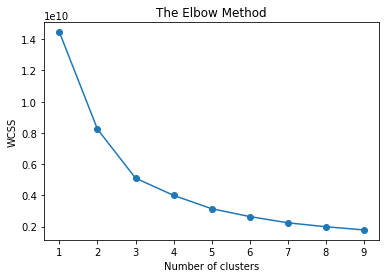

In [62]:
plt.plot(range(1, k_range,1), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
%%time

culster_count = 5
wcss = []
for i in range(1, culster_count):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


Wall time: 6.69 s


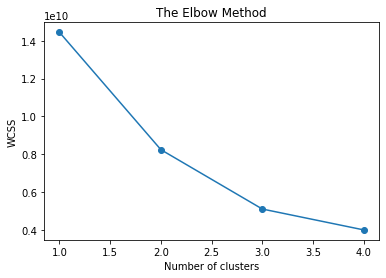

In [64]:
plt.plot(range(1, culster_count), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

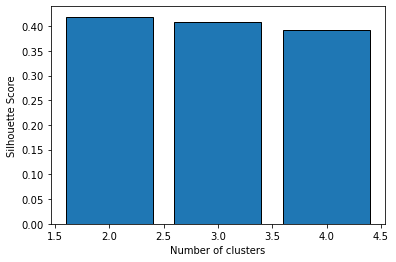

Wall time: 6min 6s


In [65]:
%%time


silhouette_scores = [] 

data_matrix = np.mat(data);

for n_cluster in range(2, 5):
    silhouette_scores.append( 
        silhouette_score(data_matrix, KMeans(n_clusters = n_cluster).fit_predict(data_matrix))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

## K-Means and Item Based Predictions

In [66]:
## from above we can say the # of cluster= 3 seems to be the elbow of the plot.
## however, using K=5 as the class variable has 5 unique values (1-5)
n_clusters = 5
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
clusters = kmeans.fit_predict(data)
clusters

array([4, 4, 0, ..., 0, 4, 4])

In [67]:
 kmeans.cluster_centers_

array([[1.82262909e+02, 2.96020637e-04, 3.06846534e-01, 1.49236690e-01,
        2.93483317e-02, 5.99230346e-02, 2.96358946e-01, 1.09612213e-01,
        5.53981478e-03, 4.08212458e-01, 4.14428892e-03, 1.17139595e-02,
        5.08732609e-02, 4.48259822e-02, 5.20996321e-02, 1.96515414e-01,
        1.76047702e-01, 2.43709561e-01, 1.12360976e-01, 1.60274031e-02,
        2.48631539e+02, 3.33159386e+01, 2.45485685e-01, 7.54514315e-01,
        9.15972428e-02, 2.21592591e-02, 8.54230981e-03, 9.70524802e-02,
        7.44280458e-02, 3.00249503e-02, 3.90747241e-02, 1.93259187e-02,
        3.00249503e-03, 1.60696917e-02, 5.51444158e-02, 2.21169704e-02,
        1.20945574e-02, 9.21469954e-02, 7.14678395e-02, 1.85647228e-02,
        1.17139595e-02, 1.82264135e-02, 2.12669683e-01, 3.92438787e-02,
        4.53334461e-02],
       [1.11392366e+03, 1.21951220e-04, 1.15487805e-01, 8.57317073e-02,
        3.37804878e-02, 7.57317073e-02, 3.51585366e-01, 4.85365854e-02,
        2.48780488e-02, 4.21341463e-01,

In [68]:
data.columns

Index(['item_id', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'user_id', 'age', 'gender_F', 'gender_M',
       'occupation_administrator', 'occupation_artist', 'occupation_doctor',
       'occupation_educator', 'occupation_engineer',
       'occupation_entertainment', 'occupation_executive',
       'occupation_healthcare', 'occupation_homemaker', 'occupation_lawyer',
       'occupation_librarian', 'occupation_marketing', 'occupation_none',
       'occupation_other', 'occupation_programmer', 'occupation_retired',
       'occupation_salesman', 'occupation_scientist', 'occupation_student',
       'occupation_technician', 'occupation_writer'],
      dtype='object')

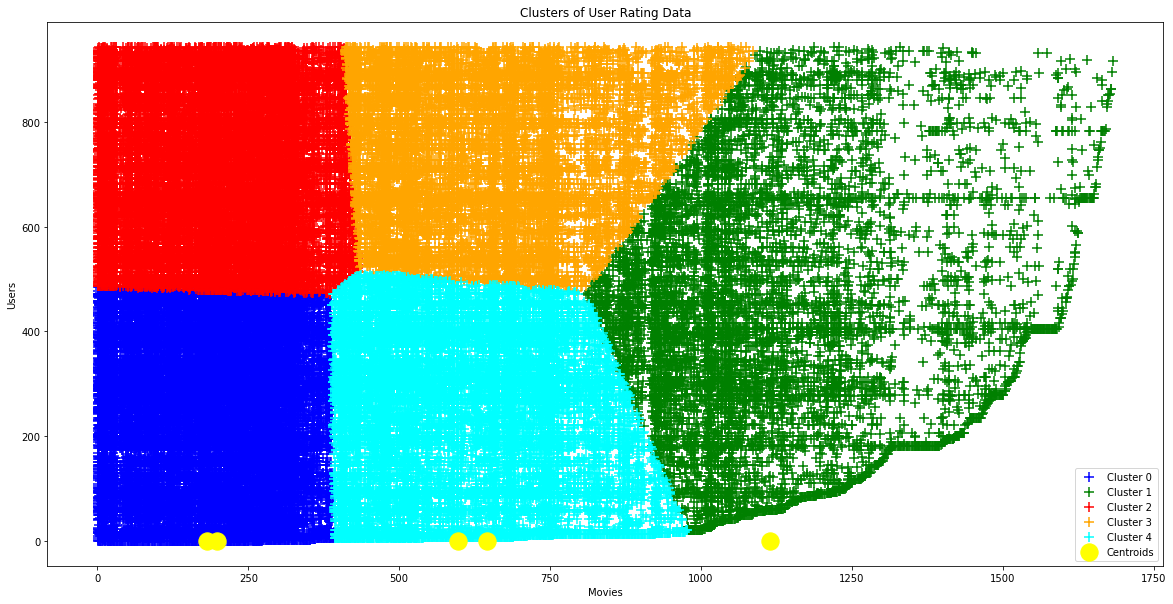

In [69]:
X = np.array(data)

plt.figure(figsize=(20,10))
colour=['blue','green','red','orange','cyan','black','pink','magenta']
for i in range(n_clusters):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 20], s = 100, color=colour[i], marker='+', label = 'Cluster '+str(i))
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 19], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of User Rating Data')
plt.xlabel('Movies')
plt.ylabel('Users')
plt.legend()
plt.show()

In [70]:
test_data = np.mat(vs_test)
test_data.shape

(20000, 45)

In [71]:
data.shape

(80000, 45)

In [72]:
## Predict Y
y_pred_test = kmeans.predict(test_data)

In [73]:
y_pred_test.shape

(20000,)

In [74]:
vs_target_test.shape

(20000,)

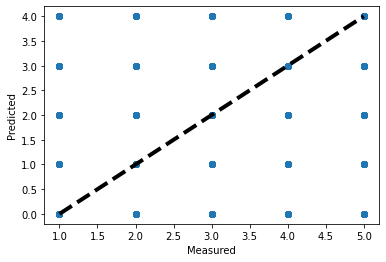

In [75]:
fig, ax = plt.subplots()
ax.scatter(vs_target_test, y_pred_test)
ax.plot([vs_target_test.min(), vs_target_test.max()], [y_pred_test.min(), y_pred_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [76]:
## Evaluate Clusters using Silhouetes

In [77]:
%%time

silhouettes = silhouette_samples(data,clusters)

Wall time: 1min 50s


In [78]:
%%time

## silhouettes mean
sl_mean = silhouettes.mean()
print(" silhouettes.mean : ",sl_mean)

 silhouettes.mean :  0.3890200392446858
Wall time: 1 ms


In [79]:
%%time

## plot the silhouette


def plot_silhouettes(data, clusters, metric='euclidean'):
    
    
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

Wall time: 0 ns


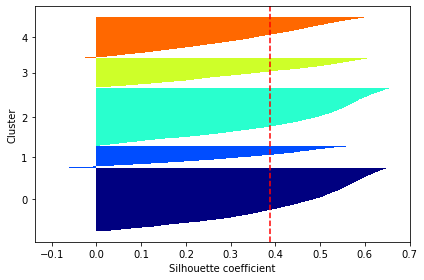

Wall time: 4min 31s


In [80]:
%%time
plot_silhouettes(data,clusters)

 ## Next, compare the clusters to the pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters

In [81]:
rating_class

0        4
1        5
2        4
3        4
4        5
        ..
99995    4
99996    3
99997    3
99998    1
99999    1
Name: rating, Length: 100000, dtype: int64

In [82]:
classes_arr = np.array(vs_target_train)
print(" classes_arr : ",classes_arr)
print(" clusters    : ",clusters)
print(" unique clusters - ",np.unique(clusters))
print(" unique ratings - ",np.unique(vs_target_train))

print("completeness_score : ",completeness_score(classes_arr,clusters))
print("homogeneity_score : ",homogeneity_score(classes_arr,clusters))

 classes_arr :  [4 4 4 ... 5 3 2]
 clusters    :  [4 4 0 ... 0 4 4]
 unique clusters -  [0 1 2 3 4]
 unique ratings -  [1 2 3 4 5]
completeness_score :  0.008591603795819101
homogeneity_score :  0.009007570588426168


In [83]:

def calculateCosineSimilarityDistance(x,D):
    
    D_norm = np.linalg.norm(D) #np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    #print("D_norm ",D_norm," x_norm ",x_norm)
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dist = 1 - sims
    
    return dist

In [84]:
# test_data = vs_test.drop(columns=not_needed_columns,inplace=False)
# test_data = pd.get_dummies(test_data)
test_data

matrix([[744,   0,   0, ...,   0,   0,   0],
        [315,   0,   0, ...,   0,   0,   0],
        [537,   0,   0, ...,   1,   0,   0],
        ...,
        [944,   0,   0, ...,   1,   0,   0],
        [117,   0,   1, ...,   1,   0,   0],
        [258,   0,   0, ...,   1,   0,   0]], dtype=int64)

In [85]:
#test_data.values

In [86]:
centroids =  kmeans.cluster_centers_
print(" centroids ",centroids)
print(" kmeans Score ",kmeans.score)

 centroids  [[1.82262909e+02 2.96020637e-04 3.06846534e-01 1.49236690e-01
  2.93483317e-02 5.99230346e-02 2.96358946e-01 1.09612213e-01
  5.53981478e-03 4.08212458e-01 4.14428892e-03 1.17139595e-02
  5.08732609e-02 4.48259822e-02 5.20996321e-02 1.96515414e-01
  1.76047702e-01 2.43709561e-01 1.12360976e-01 1.60274031e-02
  2.48631539e+02 3.33159386e+01 2.45485685e-01 7.54514315e-01
  9.15972428e-02 2.21592591e-02 8.54230981e-03 9.70524802e-02
  7.44280458e-02 3.00249503e-02 3.90747241e-02 1.93259187e-02
  3.00249503e-03 1.60696917e-02 5.51444158e-02 2.21169704e-02
  1.20945574e-02 9.21469954e-02 7.14678395e-02 1.85647228e-02
  1.17139595e-02 1.82264135e-02 2.12669683e-01 3.92438787e-02
  4.53334461e-02]
 [1.11392366e+03 1.21951220e-04 1.15487805e-01 8.57317073e-02
  3.37804878e-02 7.57317073e-02 3.51585366e-01 4.85365854e-02
  2.48780488e-02 4.21341463e-01 1.54878049e-02 3.53658537e-03
  2.30487805e-02 4.13414634e-02 3.30487805e-02 1.53048780e-01
  3.64634146e-02 1.56707317e-01 2.621951

In [87]:
%%time

## check the clusters the test data set belongs to

results = []

#vs_test = np.array(test_data.values)
vs_test = np.array(test_data)
for doc in vs_test:
    dic = {}
    sim = []
    cluster = 0
    for centroid in centroids:
        #print("d ",doc)
        val = np.ravel(calculateCosineSimilarityDistance(doc,centroid))[0]
        #print("val ",val)
        centroid_doc_sim = 1 - val #Need to subtract from 1 as our function returns distance and not similarity
        #print("centroid_doc_sim ",centroid_doc_sim)
        sim.append(centroid_doc_sim) 
        dic['Cosine Similarity to Cluster '+str(cluster + 1)] = str(np.ravel(centroid_doc_sim)[0])
        cluster += 1
        
    dic['Predicted Cluster'] = sim.index(max(sim))  + 1
    
    results.append(dic)

test_cluster = pd.DataFrame(results)

pd.options.display.max_rows = 500
print("Categorized test data shape ",test_cluster.shape)

test_cluster

Categorized test data shape  (20000, 6)
Wall time: 3.33 s


,Cosine Similarity to Cluster 1,Cosine Similarity to Cluster 2,Cosine Similarity to Cluster 3,Cosine Similarity to Cluster 4,Cosine Similarity to Cluster 5,Predicted Cluster
0,0.9709749266443517,0.9473510181494612,0.8299225818298578,0.9896729616080785,0.9537395914754079,4
1,0.8287627687946635,0.9972674072387474,0.5774536899735951,0.8727616657970524,0.9975985345173263,5
2,0.9631981670086912,0.9570109471270457,0.8118454390094376,0.9846469159701056,0.9627569041946067,4
3,0.9677369003524031,0.6841075712075371,0.9898764136356895,0.9365877857616146,0.701599167989405,3
4,0.9998434525737628,0.8367300775224643,0.9403573865752737,0.9918586954347244,0.8494902896871143,1
...,...,...,...,...,...,...
19995,0.8927455622177909,0.5220317540137089,0.9946037868111292,0.8514114880218381,0.5398102571155515,3
19996,0.9834837647232165,0.7386233856152672,0.9833902101554626,0.9629858215473304,0.753502032007716,1
19997,0.9385422497945908,0.9764292097609147,0.7641543010748039,0.9682034029067396,0.9800200307978685,5
19998,0.8956224385679766,0.5276853719421488,0.9952665596829006,0.8548790736681521,0.5453644933567039,3


In [88]:


rms = sqrt(mean_squared_error(vs_target_test, y_pred_test))

In [89]:
rms

2.568287367098939

In [90]:
print(accuracy_score(vs_target_test, y_pred_test) * 100)

14.580000000000002


## User Based CF

In [91]:
## Item Based Recommendation
movies = movie_data
movies.columns = ['item_id','movie_title']
display(movies.head())
display(item_data.head())

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [92]:
item_data.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [93]:
#Function to get the rating given by a user to a movie.
def get_rating_(ratings,userid,movieid):
    return (ratings.loc[(ratings.user_id==userid) & (ratings.item_id == movieid),'rating'].iloc[0])

# Function to get the list of all movie ids the specified user has rated.
def get_movieids_(ratings,userid):
    return (ratings.loc[(ratings.user_id==userid),'item_id'].tolist())

# Function to get the movie titles against the movie id.
def get_movie_title_(movieid):
    return (movies.loc[(movies.item_id == movieid),'movie_title'].iloc[0])

def get_movie_genre_(movie_id):
    g = np.array(genre_data['Genre'])
    data_g= item_data.loc[item_data.movie_id==movie_id]
    gen = "";
    for i in range(len(g)):
        if(data_g[g[i]].iloc[0] == 1):
            if(len(gen) == 0):
                gen =g[i]
            else:
                gen +=" | "+g[i] 
    return gen

def get_movie_genre_by_title(title):
    g = np.array(genre_data['Genre'])
    data_g= item_data.loc[item_data.movie_title==title]
    gen = "";
    for i in range(len(g)):
        if(data_g[g[i]].iloc[0] == 1):
            if(len(gen) == 0):
                gen =g[i]
            else:
                gen +=" | "+g[i] 
    return gen

In [94]:
def distance_similarity_score(ratings, user1,user2):
    '''
    user1 & user2 : user ids of two users between which similarity score is to be calculated.
    '''
    both_watch_count = 0
    for element in ratings.loc[ratings.user_id==user1,'item_id'].tolist():
        if element in ratings.loc[ratings.user_id==user2,'item_id'].tolist():
            both_watch_count += 1
            
    if both_watch_count == 0 :
        return 0
    distance = []
    for element in ratings.loc[ratings.user_id==user1,'item_id'].tolist():
        if element in ratings.loc[ratings.user_id==user2,'item_id'].tolist():
            rating1 = get_rating_(ratings,user1,element)
            #print(rating1)
            rating2 = get_rating_(ratings,user2,element)
            distance.append(pow(rating1 - rating2, 2))
    total_distance = sum(distance)
    return 1/(1+sqrt(total_distance))

In [95]:
distance_similarity_score(user_rating_data,1,250)

0.08179977728257459

### Calculating Similarity Scores based on the distances have an inherent problem. We do not have a threshold to decide how much more distance between two users is to be considered for calculating whether the users are close enough or far enough. On the other side, this problem is resolved by pearson correlation method as it always returns a value between -1 & 1 which clearly provides us with the boundaries for closeness as we prefer.

In [96]:
def pearson_correlation_score(ratings,user1,user2):
    '''
    user1 & user2 : user ids of two users between which similarity score is to be calculated.
    '''
    both_watch_count = []
    for element in ratings.loc[ratings.user_id==user1,'item_id'].tolist():
        if element in ratings.loc[ratings.user_id==user2,'item_id'].tolist():
            both_watch_count.append(element)
    if len(both_watch_count) == 0 :
        return 0
   
    rating_sum_1 = sum([get_rating_(ratings,user1,element) for element in both_watch_count])
    rating_sum_2 = sum([get_rating_(ratings,user2,element) for element in both_watch_count])
    
    rating_squared_sum_1 = sum([pow(get_rating_(ratings,user1,element),2) for element in both_watch_count])
    rating_squared_sum_2 = sum([pow(get_rating_(ratings,user2,element),2) for element in both_watch_count])
    
    product_sum_rating = sum([get_rating_(ratings,user1,element) * get_rating_(ratings,user2,element) for element in both_watch_count])
    
    numerator = product_sum_rating - ((rating_sum_1 * rating_sum_2) / len(both_watch_count))
    denominator = sqrt((rating_squared_sum_1 - pow(rating_sum_1,2) / len(both_watch_count)) * (rating_squared_sum_2 - pow(rating_sum_2,2) / len(both_watch_count)))
    if denominator == 0:
        return 0
    return numerator/denominator

In [97]:
pearson_correlation_score(user_rating_data, 1,250)

0.18878134876750027

## Most Similar Users
#### The objective is to find out Most Similar Users to the targeted user. Here we have two metrics to find the score i.e. distance and correlation.

In [98]:
user_ids = user_rating_data.user_id.unique().tolist()
for nth_user in user_ids[:2]:
    print(nth_user)

196
186


In [99]:

def most_similar_users_(ratings, user1,number_of_users,metric='pearson'):
    '''
    user1 : Targeted User
    number_of_users : number of most similar users you want to user1.
    metric : metric to be used to calculate inter-user similarity score. ('pearson' or else)
    '''
    # Getting distinct user ids.
    user_ids = ratings.user_id.unique().tolist()
    
    # Getting similarity score between targeted and every other user in the list(or subset of the list).
    if(metric == 'pearson'):
        similarity_score = [(pearson_correlation_score(ratings,user1,nth_user),nth_user) for nth_user in user_ids if nth_user != user1]
    else:
        similarity_score = [(distance_similarity_score(ratings,user1,nth_user),nth_user) for nth_user in user_ids if nth_user != user1]
    
    # Sorting in descending order.
    similarity_score.sort()
    similarity_score.reverse()
    
    similar_users = pd.DataFrame(similarity_score,columns=['similarity_score','user_id'])
    
    # Returning the top most 'number_of_users' similar users. 
    return similar_users.iloc[:number_of_users]

## Getting Movie Recommendations for Targeted User
### The concept is very simple. First, we need to iterate over only those movies not watched(or rated) by the targeted user and the subsetting items based on the users highly correlated with targeted user. Here, we have used a weighted similarity approach where we have taken product of rating and score into account to make sure that the highly similar users affect the recommendations more than those less similar. Then, we have sorted the list on the basis of score along with movie ids and returned the movie titles against those movie ids.

In [100]:
def get_recommendation_(ratings, userid,top_k=10):
    user_ids = ratings.user_id.unique().tolist()
    total = {}
    similariy_sum = {}
    
    # Iterating over subset of user ids.
    for user in user_ids:
        
        # not comparing the user to itself (obviously!)
        if user == userid:
            continue
        
        # Getting similarity score between the users.
        score = pearson_correlation_score(ratings,userid,user)
        
        # not considering users having zero or less similarity score.
        if score <= 0:
            continue
        
        # Getting weighted similarity score and sum of similarities between both the users.
        for movieid in get_movieids_(ratings,user):
            # Only considering not watched/rated movies
            if movieid not in get_movieids_(ratings,userid) or get_rating_(ratings,userid,movieid) == 0:
                total[movieid] = 0
                total[movieid] += get_rating_(ratings,user,movieid) * score
                similariy_sum[movieid] = 0
                similariy_sum[movieid] += score
    
    #print(" total ",total)
    # Normalizing ratings
    ranking = [(tot/similariy_sum[movieid],movieid) for movieid,tot in total.items()]
    ranking.sort()
    ranking.reverse()
    
    # Getting movie titles against the movie ids.
    recommendations = pd.DataFrame(ranking,columns=['rating','movie_id'])
    recomm_movies = []
    mov_gen = []
    for score,movieid in ranking:
        recomm_movies.append(get_movie_title_(movieid))
        mov_gen.append(get_movie_genre_(movieid))
    
    recommendations['movie_name']=recomm_movies
    recommendations['genre']=mov_gen
    return recommendations.iloc[:top_k]

In [101]:
## Implementations

In [102]:
%%time
test_user_id = 320
most_similar_user_df = most_similar_users_(user_rating_data,test_user_id,5)
most_similar_user_df

Wall time: 4min 14s


,similarity_score,user_id
0,1.0,317
1,1.0,205
2,1.0,856
3,1.0,845
4,1.0,762


In [103]:
##conda install tabulate

In [104]:
%%time

recommended_data = get_recommendation_(user_rating_data,test_user_id)

Wall time: 6min 24s


In [105]:
print("Using User based CF - Top 10 movie Recommendation for test user ",test_user_id)
print()
print(recommended_data.to_markdown())

Using User based CF - Top 10 movie Recommendation for test user  320

|    |   rating |   movie_id | movie_name                          | genre            |
|---:|---------:|-----------:|:------------------------------------|:-----------------|
|  0 |        5 |       1656 | Little City (1998)                  | Comedy | Romance |
|  1 |        5 |       1643 | Angel Baby (1995)                   | Drama            |
|  2 |        5 |       1642 | Some Mother's Son (1996)            | Drama            |
|  3 |        5 |       1639 | Bitter Sugar (Azucar Amargo) (1996) | Drama            |
|  4 |        5 |       1620 | Sixth Man, The (1997)               | Comedy           |
|  5 |        5 |       1612 | Leading Man, The (1996)             | Romance          |
|  6 |        5 |       1605 | Love Serenade (1996)                | Comedy           |
|  7 |        5 |       1592 | Magic Hour, The (1998)              | Drama            |
|  8 |        5 |       1589 | Schizopolis (1996) 

## Item base CF

In [106]:
movies.columns = ['item_id','movie_title']
movies.head()

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [107]:
user_rating_data.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [108]:
# pivot ratings into movie features
rating_crosstab = user_rating_data.pivot(
    index='user_id',
    columns='item_id',
    values='rating'
).fillna(0)

display(rating_crosstab)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
## Since we want the item-based collaborative filtering we will transpose the rating_crosstab matrix.
X = rating_crosstab.T

In [110]:
X.shape

(1682, 943)

In [111]:
%%time
movie_ids = rating_crosstab.columns
movie_titles = []
genre = []

## populate genre and movie titles
for id in movie_ids:
    genre.append(get_movie_genre_(id))
    movie_titles.append(movie_data.loc[movie_data['item_id'] == id]['movie_title'].iloc[0])
    

Wall time: 4.56 s


In [112]:
SVD = TruncatedSVD(n_components=12, random_state=5)
resultant_matrix = SVD.fit_transform(X)

### correlation matrix
corr_mat = np.corrcoef(resultant_matrix)

print(" resultant_matrix.shape ",resultant_matrix.shape)

print(" corr_mat.shape ",corr_mat.shape)


 resultant_matrix.shape  (1682, 12)
 corr_mat.shape  (1682, 1682)


In [113]:
SVD.explained_variance_ratio_

array([0.22007639, 0.04868558, 0.03851539, 0.02059447, 0.02024595,
       0.01567126, 0.01290537, 0.01120471, 0.00928316, 0.00808862,
       0.00714724, 0.00702458])

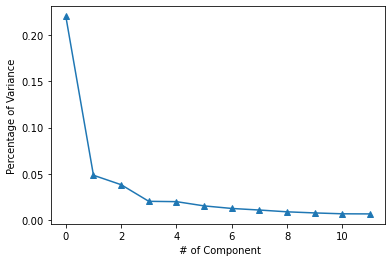

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0, 12), SVD.explained_variance_ratio_  , marker='^')
plt.xlabel(' # of Component')
plt.ylabel('Percentage of Variance')
plt.show()

In [115]:
transformed_data = pd.DataFrame(SVD.fit_transform(X))
transformed_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,61.469396,21.359545,-3.697730,-2.578074,22.230592,15.957282,12.829525,-2.767253,6.548878,0.199350,2.130096,-2.076826
1,22.537180,1.719984,-13.616213,-0.515065,-6.449824,-2.408011,0.004229,-1.986490,-8.020166,-4.773049,1.034283,-2.768535
2,12.767067,7.006782,-2.535940,-7.765723,-0.694754,-4.603773,-0.298696,-2.442948,2.645882,-2.941722,-0.908671,-1.561933
3,38.407419,-3.195173,-5.761064,-6.843589,-6.046400,-6.970191,-0.937356,3.546745,-5.550687,-6.054241,1.831187,5.714099
4,13.842238,3.748582,-5.764248,-2.849429,-2.477362,-4.736727,-6.230786,0.062231,2.072950,5.599880,2.175976,1.696457


In [116]:
n_clusters =5
kmeans = KMeans(n_clusters=n_clusters);
kmeans.fit(transformed_data)
clusters_reduced_dim = kmeans.predict(transformed_data)
centroids_reduced_dim = pd.DataFrame(kmeans.cluster_centers_)

print(" clusters_reduced_dim ",clusters_reduced_dim)
print(" centroids_reduced_dim ",centroids_reduced_dim)

 clusters_reduced_dim  [1 2 2 ... 0 0 0]
 centroids_reduced_dim             0          1          2         3          4         5         6  \
0   2.822917   0.508371   0.164677  0.098894  -0.329156 -1.107689 -0.287783   
1  48.870622  -4.358644  -2.967996 -0.780739   0.511091  4.393469  1.641951   
2  21.384059   4.552650  -5.551538 -1.680433   0.372151 -3.112177 -1.299328   
3  19.152002  -7.949878   6.244619  0.474902   1.260385 -1.630597 -0.871527   
4  20.150617  16.665011  12.532038  9.755899 -10.205622 -0.997202  1.094249   

          7         8         9        10        11  
0 -0.743552 -0.049361 -0.077275  0.066800 -0.249920  
1  4.054658  1.004927 -0.299916  0.055508  0.587475  
2 -2.046613 -0.142597 -0.217916  0.307891 -0.172993  
3 -2.643093 -1.099404  0.290733 -1.069844 -0.418026  
4  0.086942  1.198143  0.067674 -0.512585  1.050811  


 silhouettes_reduced_dim  [ 0.15740836  0.18276393 -0.1987583  -0.0961995  -0.15376523]


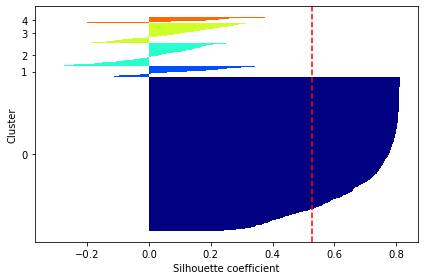

Wall time: 10.4 s


In [117]:
%%time

silhouettes_reduced_dim = silhouette_samples(transformed_data,clusters_reduced_dim)
print(" silhouettes_reduced_dim ",silhouettes_reduced_dim[:5])

plot_silhouettes(transformed_data,clusters_reduced_dim)

In [118]:

    
### correlation matrix - by movie id
def get_similar_movies(movie_id,top_k=10):
    col_idx = rating_crosstab.columns.get_loc(movie_id)
    corr_specific = corr_mat[col_idx]
    corr_df = pd.DataFrame({'corr_specific':corr_specific, 'movie_id': movie_ids})
    corr_df['movie_title']=movie_titles
    corr_df['genre'] = genre
    #corr_df.reindex(index=movie_ids)
    similar_movies = corr_df.sort_values('corr_specific', ascending=False).head(top_k)
    print("using item based CF the Top ",top_k,"movies similar to ",movie_data.loc[movie_data['item_id'] == movie_id]['movie_title'].iloc[0], "(Id = ",movie_id," - genre  ",get_movie_genre_(movie_id),")")
    display(similar_movies)
    return similar_movies

### correlation matrix - by movie name
def get_similar_movies_by_title(title,top_k=10):
    print("Input ")
    display(movie_data.loc[movie_data['movie_title'] == title])
    query_id = movie_data.loc[movie_data['movie_title'] == title]['item_id'].iloc[0]
    df = get_similar_movies(query_id,top_k)

## Similar Movies to Star Wars (1977) - Id=50

In [119]:
movie_data.loc[movie_data['item_id'] == 50]

,item_id,movie_title
49,50,Star Wars (1977)


In [120]:
df = get_similar_movies(50,15)

using item based CF the Top  15 movies similar to  Star Wars (1977) (Id =  50  - genre   Action | Adventure | Romance | Sci-Fi | War )


,corr_specific,movie_id,movie_title,genre
49,1.000000,50,Star Wars (1977),Action | Adventure | Romance | Sci-Fi | War
180,0.988305,181,Return of the Jedi (1983),Action | Adventure | Romance | Sci-Fi | War
95,0.941045,96,Terminator 2: Judgment Day (1991),Action | Sci-Fi | Thriller
0,0.932872,1,Toy Story (1995),Animation | Children's | Comedy
194,0.930520,195,"Terminator, The (1984)",Action | Sci-Fi | Thriller
173,0.924179,174,Raiders of the Lost Ark (1981),Action | Adventure
171,0.922674,172,"Empire Strikes Back, The (1980)",Action | Adventure | Drama | Romance | Sci-Fi ...
143,0.915728,144,Die Hard (1988),Action | Thriller
78,0.914294,79,"Fugitive, The (1993)",Action | Thriller
175,0.892519,176,Aliens (1986),Action | Sci-Fi | Thriller | War


### Similar Movies to Gone with the Wind (1939)

In [121]:
df = get_similar_movies_by_title('Gone with the Wind (1939)',15)

Input 


,item_id,movie_title
132,133,Gone with the Wind (1939)


using item based CF the Top  15 movies similar to  Gone with the Wind (1939) (Id =  133  - genre   Drama | Romance | War )


,corr_specific,movie_id,movie_title,genre
132,1.000000,133,Gone with the Wind (1939),Drama | Romance | War
484,0.967552,485,My Fair Lady (1964),Musical | Romance
608,0.964223,609,Father of the Bride (1950),Comedy
135,0.963229,136,Mr. Smith Goes to Washington (1939),Drama
632,0.961758,633,"Christmas Carol, A (1938)",Drama
131,0.957981,132,"Wizard of Oz, The (1939)",Adventure | Children's | Drama | Musical
495,0.957241,496,It's a Wonderful Life (1946),Drama
130,0.951084,131,Breakfast at Tiffany's (1961),Drama | Romance
497,0.947395,498,"African Queen, The (1951)",Action | Adventure | Romance | War
426,0.930274,427,To Kill a Mockingbird (1962),Drama


## Observation

#### As we saw abpve that every movie has a ~100% Correlation Pearson with itself as expected. With the Item-Based collaborative filtered we can recommend movies based on user preference. For example, if someone likes the “Gone with the Wind (1939)” we can recommend him to watch the ” My Fair Lady (1964)“. It works also on the other way around. If someone does not like the ” Star Wars (1977)” we can suggest him to avoid watching the “Return of the Jedi (1983)“

In [122]:
#pip install mlxtend  

In [123]:
movies

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [124]:
user_rating_data.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [125]:
ratings_df = pd.merge(user_rating_data,movies[['movie_title','item_id']],left_on='item_id',right_on='item_id')
ratings_df.head()

,user_id,item_id,rating,movie_title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [126]:
ratings_df.isnull().sum()

user_id        0
item_id        0
rating         0
movie_title    0
dtype: int64

In [127]:
## number of ratings for each movie
ratings_count = ratings_df.groupby(by="movie_title")['rating'].count().reset_index().rename(columns={'rating':'totalRatings'})[['movie_title','totalRatings']]

In [128]:
ratings_count.shape

(1664, 2)

In [129]:
len(ratings_df['movie_title'].unique())

1664

In [130]:
ratings_count.head()

,movie_title,totalRatings
0,'Til There Was You (1997),9
1,1-900 (1994),5
2,101 Dalmatians (1996),109
3,12 Angry Men (1957),125
4,187 (1997),41


In [131]:
ratings_total = pd.merge(ratings_df,ratings_count,on='movie_title',how='left')
print("ratings_total - Shape ",ratings_total.shape)
display(ratings_total.head())

ratings_total - Shape  (100000, 5)


,user_id,item_id,rating,movie_title,totalRatings
0,196,242,3,Kolya (1996),117
1,63,242,3,Kolya (1996),117
2,226,242,5,Kolya (1996),117
3,154,242,3,Kolya (1996),117
4,306,242,5,Kolya (1996),117


In [132]:
## five point summary
ratings_count['totalRatings'].describe()

count    1664.000000
mean       60.096154
std        80.956484
min         1.000000
25%         7.000000
50%        27.000000
75%        80.250000
max       583.000000
Name: totalRatings, dtype: float64

In [133]:
## There is a huge difference between minimum number of ratings and maximum number of ratings.

In [134]:
quantiles = ratings_count['totalRatings'].quantile(np.arange(0,1.01,0.01))
display(quantiles)

0.00      1.00
0.01      1.00
0.02      1.00
0.03      1.00
0.04      1.00
0.05      1.00
0.06      1.00
0.07      1.00
0.08      1.04
0.09      2.00
0.10      2.00
0.11      2.00
0.12      2.00
0.13      3.00
0.14      3.00
0.15      3.00
0.16      4.00
0.17      4.00
0.18      4.00
0.19      4.00
0.20      5.00
0.21      5.00
0.22      5.00
0.23      6.00
0.24      6.00
0.25      7.00
0.26      7.00
0.27      7.00
0.28      8.00
0.29      8.00
0.30      9.00
0.31      9.00
0.32     10.00
0.33     10.00
0.34     11.00
0.35     12.00
0.36     12.00
0.37     13.00
0.38     14.00
0.39     15.00
0.40     16.00
0.41     17.00
0.42     18.00
0.43     19.00
0.44     19.00
0.45     21.00
0.46     22.00
0.47     23.00
0.48     24.24
0.49     26.00
0.50     27.00
0.51     28.00
0.52     30.00
0.53     31.00
0.54     32.00
0.55     34.00
0.56     37.00
0.57     39.00
0.58     40.00
0.59     42.00
0.60     43.00
0.61     44.00
0.62     46.00
0.63     48.00
0.64     50.00
0.65     53.00
0.66     5

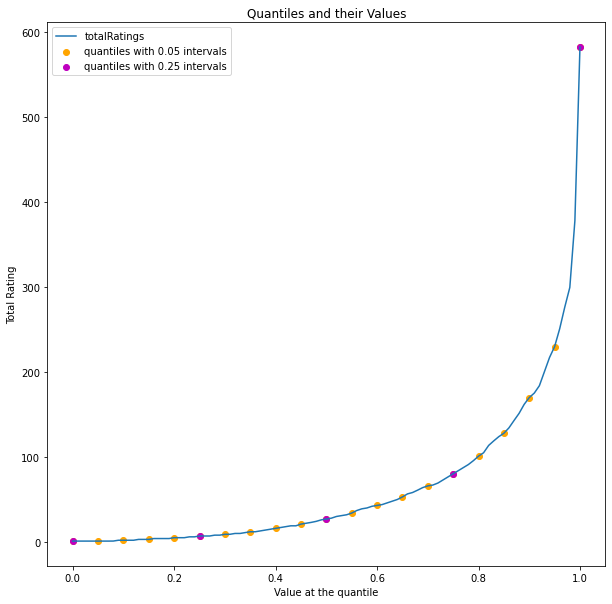

In [135]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('Total Rating')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [136]:
## ignore data where total ratings is <10
votes_count_threshold = 10

In [137]:
ratings_top = ratings_total.query('totalRatings > @votes_count_threshold')
ratings_top.shape

(97632, 5)

In [138]:
ratings_top.head()

,user_id,item_id,rating,movie_title,totalRatings
0,196,242,3,Kolya (1996),117
1,63,242,3,Kolya (1996),117
2,226,242,5,Kolya (1996),117
3,154,242,3,Kolya (1996),117
4,306,242,5,Kolya (1996),117


In [139]:
## remove duplicate entries for [title,userId] pairs
if not ratings_top[ratings_top.duplicated(['user_id','movie_title'])].empty:
    ratings_top = ratings_top.drop_duplicates(['user_id','movie_title'])

In [140]:
ratings_top.shape


(97332, 5)

In [141]:
## create pivot table
df_for_knn = ratings_top.pivot(index='movie_title',columns='user_id',values='rating').fillna(0)
df_for_knn.shape

(1111, 943)

In [142]:
df_for_knn.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2 Days in the Valley (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
"20,000 Leagues Under the Sea (1954)",3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
## using sparse matrix representation of this matrix

df_for_knn_sparse = csr_matrix(df_for_knn.values)

df_for_knn_sparse.shape

(1111, 943)

## Recommendations using KNearestNeighbors method

In [144]:
model_knn = NearestNeighbors(metric='cosine',algorithm='brute')

In [145]:
model_knn.fit(df_for_knn_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [146]:
query_index = np.random.choice(df_for_knn.shape[0])
distances, indices = model_knn.kneighbors(df_for_knn.iloc[query_index,:].values.reshape(1,-1),n_neighbors=top_k)

print(" query_index ",query_index,"\n\n distances ",np.ravel(distances),"\n\n indices ",np.ravel(indices))

 query_index  814 

 distances  [0.         0.53371712 0.53438498 0.53965269 0.54571602 0.54615142
 0.55141992 0.55671404 0.56375231 0.56626209 0.56904069 0.57177541
 0.57554088 0.57872742 0.58017854 0.58374049 0.58592085 0.58638122
 0.58685213 0.58976682 0.5912872  0.59349323 0.59486937 0.59500525
 0.5979271  0.60066915 0.60280532 0.60403111 0.60764037 0.60792168] 

 indices  [ 814  572  720 1061  470  619  718  813  964  207  765  624   56  519
   35  191  282  160   19  187  163   59  433  475  201  815  912  895
  575  927]


In [147]:
df_for_knn

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2 Days in the Valley (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
"20,000 Leagues Under the Sea (1954)",3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyatt Earp (1994),0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Young Frankenstein (1974),5.0,0.0,0.0,0.0,4.0,4.0,5.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Young Guns (1988),3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [148]:
def get_knn_recommendation(query_movie,top_k=6):
    
    distances, indices = model_knn.kneighbors(df_for_knn.loc[query_movie].values.reshape(1,-1),n_neighbors=top_k)

    print(" Input Movie = ",query_movie,"\n\n distance = ",np.ravel(distances),"\n Corresponding movies indices = ",indices)
    print()
    distance = []
    movie = []
    genre = []
    movieid = []
    for i in range(0,len(distances.flatten())):
        if i==0:
            print("Recommendations using knn for movie: {0} with genre as {1}\n".format(query_movie, get_movie_genre_by_title(query_movie)))
        else:
            print("{0}: {1}, with distance of {2}".format(i,df_for_knn.index[indices.flatten()[i]],distances.flatten()[i]))
            distance.append(distances.flatten()[i])
            movie.append(df_for_knn.index[indices.flatten()[i]])
            genre.append(get_movie_genre_by_title(df_for_knn.index[indices.flatten()[i]]))
            title = df_for_knn.index[indices.flatten()[i]]
            
            movieid.append(item_data.loc[item_data.movie_title==title]['movie_id'].iloc[0])
    
    df = pd.DataFrame({'distance':distance,'movie_id':movieid,'title':movie,'genre':genre})
    display("Recommended KNN DataFrame....")
    display(df)

In [149]:
get_knn_recommendation('Kolya (1996)')

 Input Movie =  Kolya (1996) 

 distance =  [0.         0.60753408 0.61775528 0.6445117  0.64779268 0.65187744] 
 Corresponding movies indices =  [[ 563  316  396  325  868 1045]]

Recommendations using knn for movie: Kolya (1996) with genre as Comedy

1: English Patient, The (1996), with distance of 0.6075340809423445
2: Full Monty, The (1997), with distance of 0.6177552760239364
3: Everyone Says I Love You (1996), with distance of 0.644511701821123
4: Secrets & Lies (1996), with distance of 0.6477926750551671
5: Ulee's Gold (1997), with distance of 0.6518774353260829


'Recommended KNN DataFrame....'

,distance,movie_id,title,genre
0,0.607534,286,"English Patient, The (1996)",Drama | Romance | War
1,0.617755,269,"Full Monty, The (1997)",Comedy
2,0.644512,319,Everyone Says I Love You (1996),Comedy | Musical | Romance
3,0.647793,285,Secrets & Lies (1996),Drama
4,0.651877,297,Ulee's Gold (1997),Drama


## Comparing KNN and item based CF recommendation 

In [150]:
def compare_knn_itembased_recommen(query_movie,top_k=6):
    ## get knn recommendation
    print("============================== KNN ============================")
    get_knn_recommendation(query_movie,top_k)
    
    print()
    print("============================== item based CF ============================")
    ## get item based recommendation
    get_similar_movies_by_title(query_movie,top_k)


In [151]:
compare_knn_itembased_recommen('Kolya (1996)',6)

============================== KNN ============================
 Input Movie =  Kolya (1996) 

 distance =  [0.         0.60753408 0.61775528 0.6445117  0.64779268 0.65187744] 
 Corresponding movies indices =  [[ 563  316  396  325  868 1045]]

Recommendations using knn for movie: Kolya (1996) with genre as Comedy

1: English Patient, The (1996), with distance of 0.6075340809423445
2: Full Monty, The (1997), with distance of 0.6177552760239364
3: Everyone Says I Love You (1996), with distance of 0.644511701821123
4: Secrets & Lies (1996), with distance of 0.6477926750551671
5: Ulee's Gold (1997), with distance of 0.6518774353260829


'Recommended KNN DataFrame....'

,distance,movie_id,title,genre
0,0.607534,286,"English Patient, The (1996)",Drama | Romance | War
1,0.617755,269,"Full Monty, The (1997)",Comedy
2,0.644512,319,Everyone Says I Love You (1996),Comedy | Musical | Romance
3,0.647793,285,Secrets & Lies (1996),Drama
4,0.651877,297,Ulee's Gold (1997),Drama



============================== item based CF ============================
Input 


,item_id,movie_title
241,242,Kolya (1996)


using item based CF the Top  6 movies similar to  Kolya (1996) (Id =  242  - genre   Comedy )


,corr_specific,movie_id,movie_title,genre
241,1.000000,242,Kolya (1996),Comedy
535,0.960207,536,Ponette (1996),Drama
895,0.949783,896,"Sweet Hereafter, The (1997)",Drama
305,0.940568,306,"Mrs. Brown (Her Majesty, Mrs. Brown) (1997)",Drama | Romance
899,0.939932,900,Kundun (1997),Drama
318,0.937144,319,Everyone Says I Love You (1996),Comedy | Musical | Romance


## Random Forest Classifier

In [152]:
# Item ID cannot be used for classification so use vs_train_rf, vs_test_rf

print(vs_train_rf.shape)
print(vs_test_rf.shape)

vs_train_rf.head()

(80000, 44)
(20000, 44)


,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
4867,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
80281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20667,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30770,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
74987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [154]:
%%time

dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(vs_train_rf, vs_target_train_rf)

Wall time: 1.26 s


In [155]:
%%time

measure_performance(vs_test_rf, vs_target_test_rf, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.342 

Wall time: 34 ms


In [156]:
%%time

rf = RandomForestClassifier(n_estimators=10, random_state=33)
rf = rf.fit(vs_train_rf, vs_target_train_rf)

Wall time: 2.19 s


In [157]:
%%time

measure_performance(vs_test_rf, vs_target_test_rf, rf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.358 

Wall time: 123 ms


In [158]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 33, 'verbose': 0, 'warm_start': False}


In [159]:

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [160]:
msl = range(1,6)
print(msl)

range(1, 6)


min_samples_leaf = 1 Train = 0.7102281250000001 Test = 0.34776250000000003
min_samples_leaf = 2 Train = 0.5971875000000001 Test = 0.369525
min_samples_leaf = 3 Train = 0.5375812499999999 Test = 0.372525
min_samples_leaf = 4 Train = 0.5031937500000001 Test = 0.37535
min_samples_leaf = 5 Train = 0.48215 Test = 0.37435
Wall time: 42.1 s


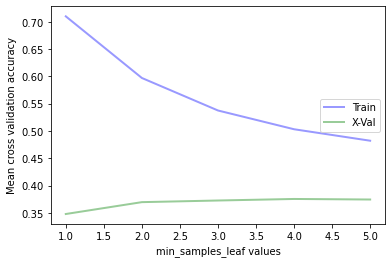

In [161]:
%%time

rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(vs_train_rf, vs_target_train_rf, rf, msl, 'min_samples_leaf', 5)

max_depth = 1 Train = 0.34137500000000004 Test = 0.34137500000000004
max_depth = 2 Train = 0.34139375000000005 Test = 0.341375
max_depth = 3 Train = 0.34181249999999996 Test = 0.34168750000000003
max_depth = 4 Train = 0.34749375000000005 Test = 0.34685
max_depth = 5 Train = 0.3484375 Test = 0.34673750000000003
max_depth = 6 Train = 0.353796875 Test = 0.35026250000000003
max_depth = 7 Train = 0.35858750000000006 Test = 0.3521125
max_depth = 8 Train = 0.36525625 Test = 0.35413750000000005
max_depth = 9 Train = 0.37528125 Test = 0.355525
max_depth = 10 Train = 0.387225 Test = 0.3595
Wall time: 32 s


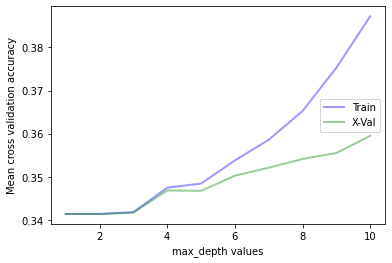

In [162]:
%%time

m_depth = [1,2,3,4,5,6,7,8,9,10]

rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(vs_train_rf, vs_target_train_rf, rf, m_depth, 'max_depth', 5)

In [163]:
nest = range(5, 101, 5)
print(nest)

range(5, 101, 5)


n_estimators = 5 Train = 0.6873875 Test = 0.3429125
n_estimators = 10 Train = 0.7102281250000001 Test = 0.34776250000000003
n_estimators = 15 Train = 0.716384375 Test = 0.35125
n_estimators = 20 Train = 0.718490625 Test = 0.35185
n_estimators = 25 Train = 0.719509375 Test = 0.3512375
n_estimators = 30 Train = 0.7199718749999999 Test = 0.35108750000000005
n_estimators = 35 Train = 0.7201531250000001 Test = 0.35196249999999996
n_estimators = 40 Train = 0.720303125 Test = 0.3533625
n_estimators = 45 Train = 0.7204062499999999 Test = 0.3524625
n_estimators = 50 Train = 0.720425 Test = 0.353425
n_estimators = 55 Train = 0.720434375 Test = 0.3536875
n_estimators = 60 Train = 0.720475 Test = 0.354
n_estimators = 65 Train = 0.7204843750000001 Test = 0.35356249999999995
n_estimators = 70 Train = 0.7204875000000001 Test = 0.354225
n_estimators = 75 Train = 0.720490625 Test = 0.35445000000000004
n_estimators = 80 Train = 0.7204937499999999 Test = 0.35400000000000004
n_estimators = 85 Train = 0.72

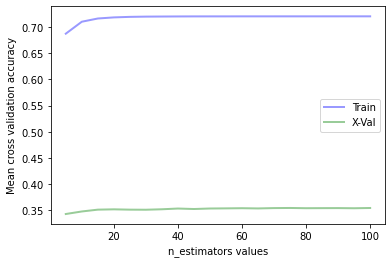

In [164]:
%%time

rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(vs_train_rf, vs_target_train_rf, rf, nest, 'n_estimators', 5)

In [165]:
%%time

rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=4, max_depth=6)
rf = rf.fit(vs_train_rf, vs_target_train_rf)

measure_performance(vs_test_rf, vs_target_test_rf, rf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.352 

Wall time: 1.52 s


In [166]:
rf.feature_importances_

array([0.        , 0.01870722, 0.02044248, 0.01350432, 0.01508261,
       0.05175605, 0.01178893, 0.00335467, 0.11544141, 0.00342079,
       0.02242768, 0.01824733, 0.01003417, 0.00440404, 0.01303754,
       0.01251547, 0.01680267, 0.07904185, 0.00172812, 0.11903283,
       0.12883708, 0.03058413, 0.0270146 , 0.00758844, 0.01168194,
       0.00019117, 0.00968474, 0.00276387, 0.00289603, 0.02833599,
       0.14138089, 0.00023852, 0.00361321, 0.0031913 , 0.00312896,
       0.00451442, 0.00638188, 0.00411758, 0.00747377, 0.00168801,
       0.00404659, 0.00415487, 0.00142455, 0.01429728])

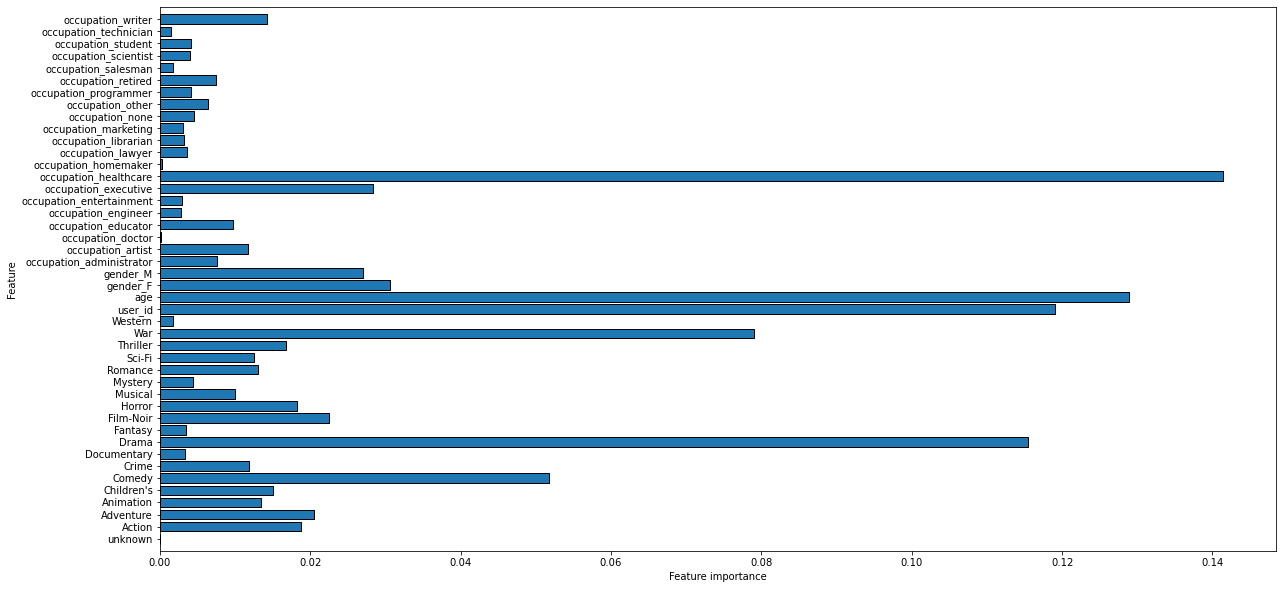

In [167]:
def plot_feature_importances(model, n_features, feature_names):
    plt.figure(figsize=(20,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

features = vs_matrix_rf.columns.values
plot_feature_importances(rf, len(features), features)

In [168]:
rf.estimators_[:3]

[DecisionTreeClassifier(max_depth=6, max_features='auto', min_samples_leaf=4,
                        random_state=1040915303),
 DecisionTreeClassifier(max_depth=6, max_features='auto', min_samples_leaf=4,
                        random_state=1575430692),
 DecisionTreeClassifier(max_depth=6, max_features='auto', min_samples_leaf=4,
                        random_state=1421307882)]

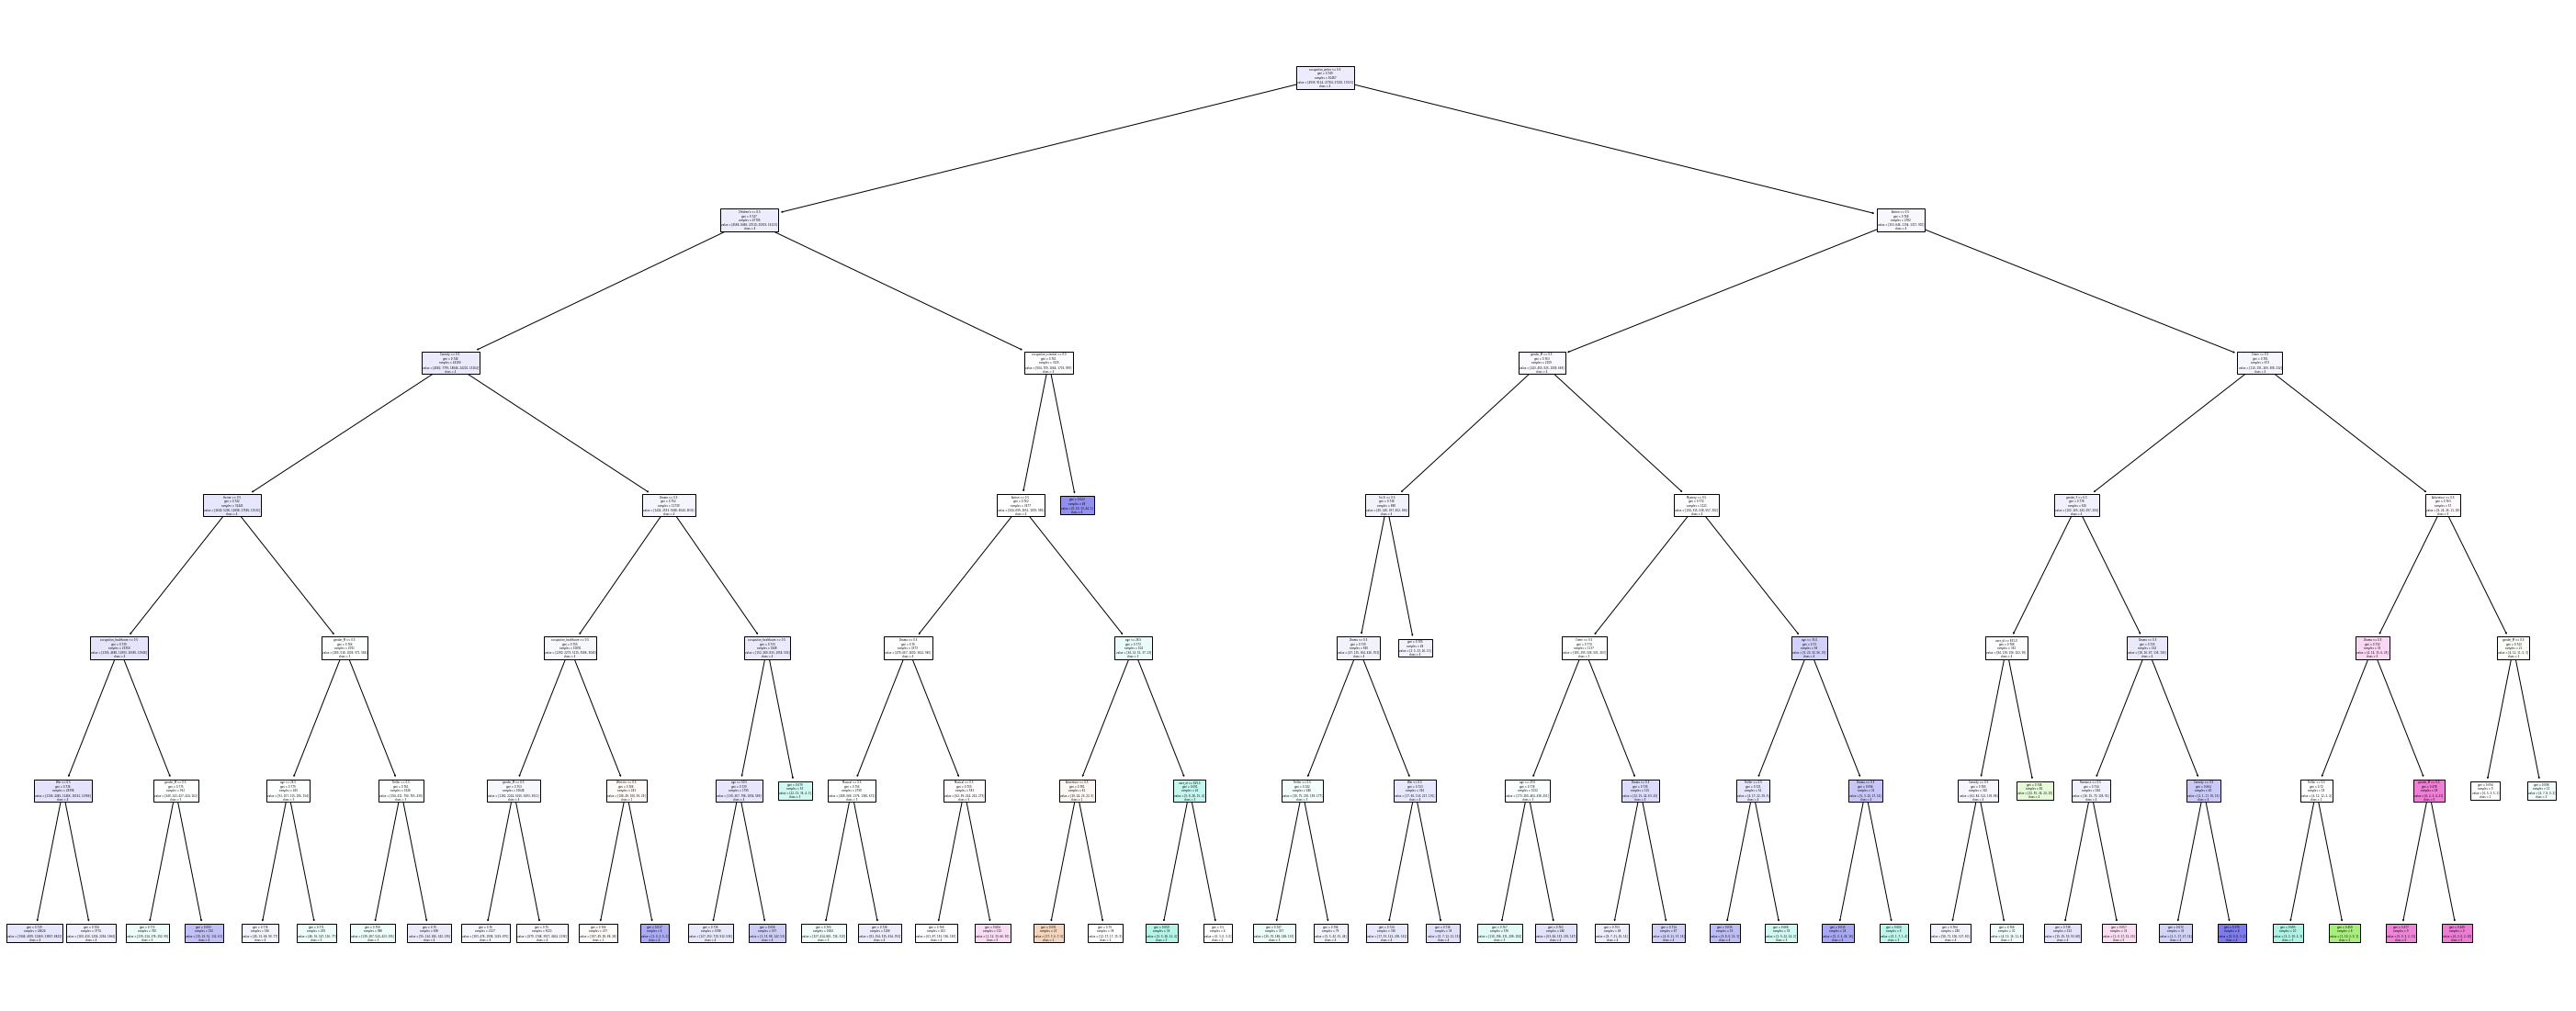

In [169]:
fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(rf.estimators_[0], feature_names=features, class_names=["1","2","3","4","5"], filled=True, ax=ax);

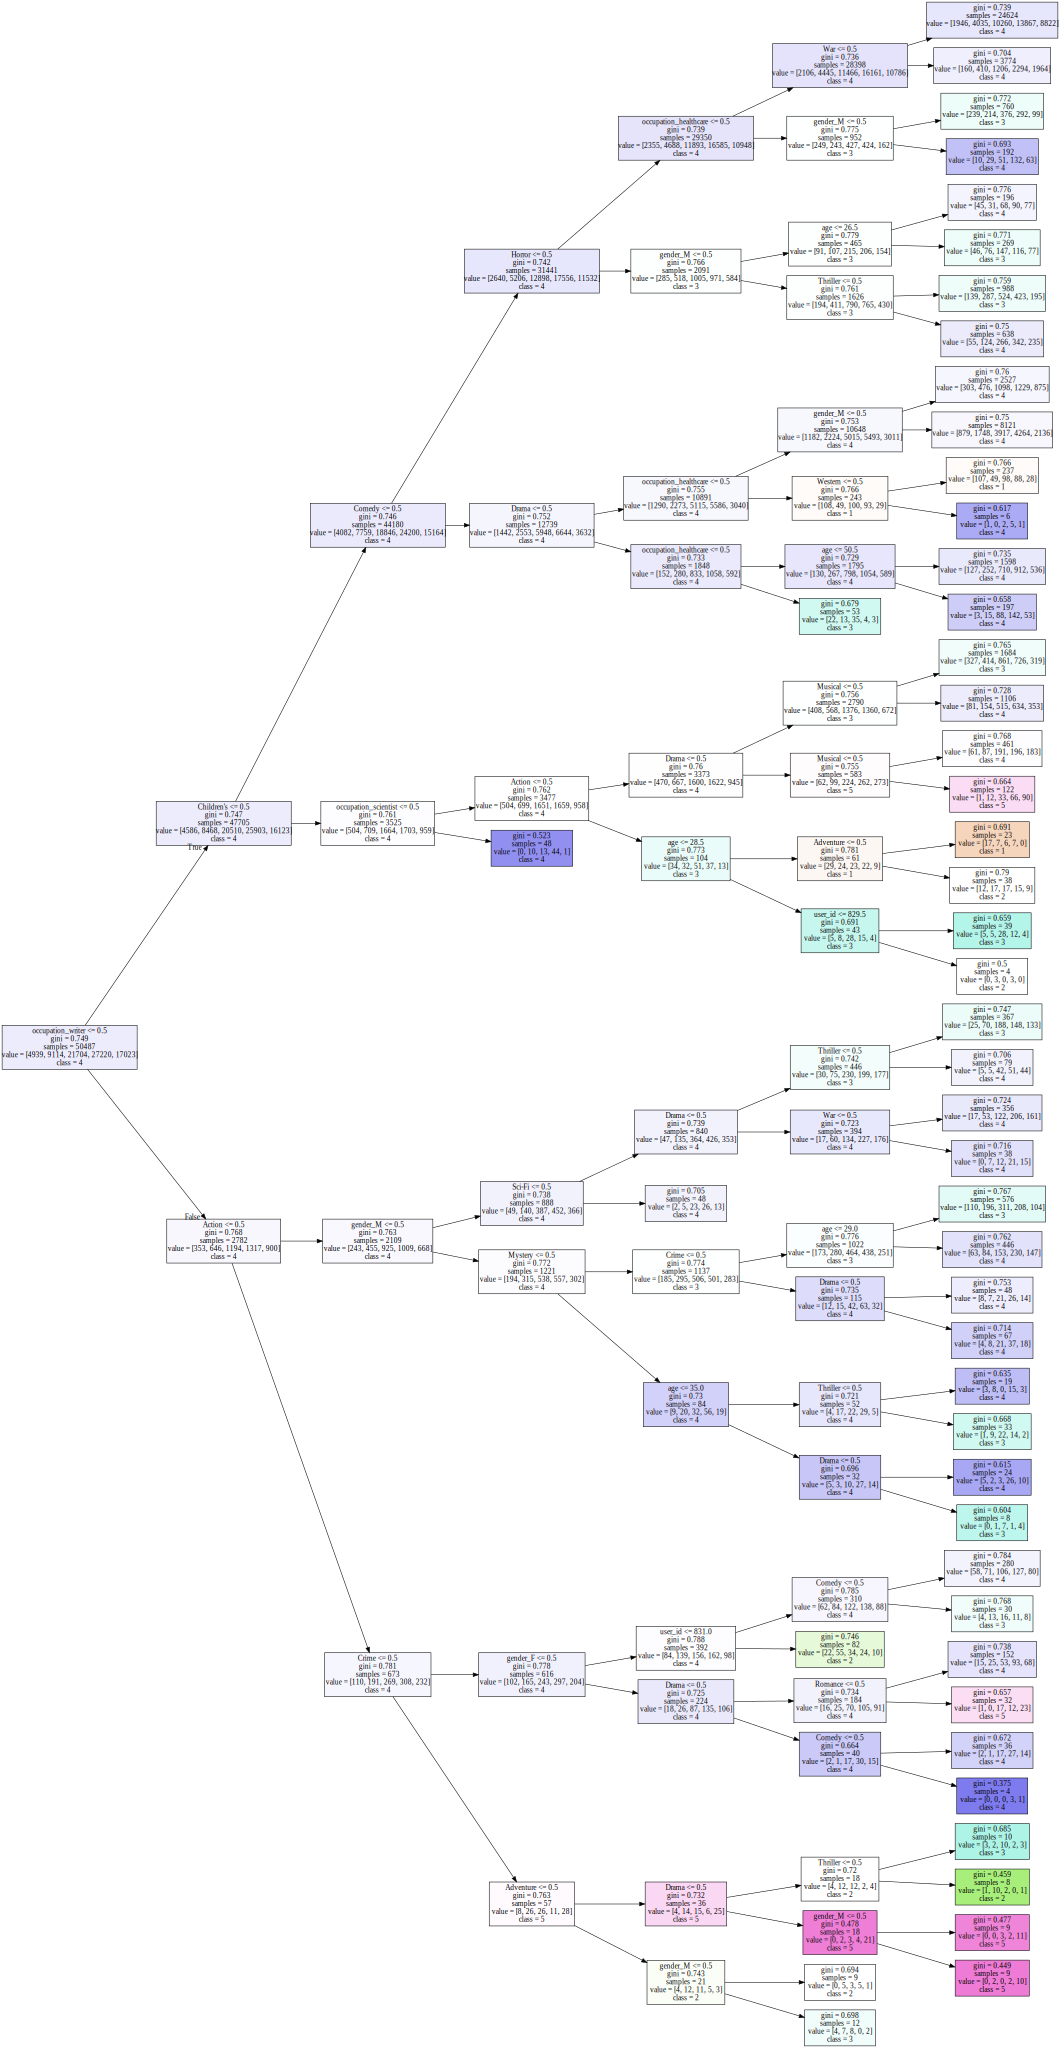

In [170]:


dot_data = export_graphviz(rf.estimators_[0],out_file=None, feature_names=features, 
                           class_names=["1","2","3","4","5"], filled=True, rotate=True)
graph = graphviz.Source(dot_data)
graph